In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def newton_raphson(f, Df, x0, true_err_max = 0.0, rel_err_max = 1e-3, i_max = 100, debug = False, plot = False):
    # initial values
    x = x0
    true_err = np.inf
    rel_err = np.inf
    i = 0
    
    # track values
    xs = []
    fs = []
    
    # iterate
    while true_err > true_err_max and rel_err > rel_err_max and i < i_max:
        # iteration number
        i += 1
        # for computing approximate relative error
        x_prev = x
        # find f(x) and f'(x)
        fx = f(x)
        Dfx = Df(x)
        # track values
        xs.append(x)
        fs.append(fx)
        # update
        x -= f(x) / Df(x)
        # compute error measures
        true_err = abs(fx)
        rel_err = abs(x / x_prev - 1)
        # debug if specified
        if debug:
            print('--------------------')
            print(f'Iteration: {i}')
            print(f'Estimate: {x:.6g}')
            print(f'Delta: {rel_err:.3g}')
    
    # plot if specified
    if plot:
        plt.figure()
        xi = np.linspace(min(xs), max(xs), 100)
        yi = [f(xj) for xj in xi]
        plt.plot(xi, yi, label = 'Function')
        plt.scatter(xs, fs, label = 'Iteration Points', marker = '+')
        plt.grid(True)
    
    # return best estimate
    return x


--------------------
Iteration: 1
Estimate: 1.27067
Delta: 0.365
--------------------
Iteration: 2
Estimate: 0.831957
Delta: 0.345
--------------------
Iteration: 3
Estimate: 0.702351
Delta: 0.156
--------------------
Iteration: 4
Estimate: 0.693189
Delta: 0.013
--------------------
Iteration: 5
Estimate: 0.693147
Delta: 6.09e-05


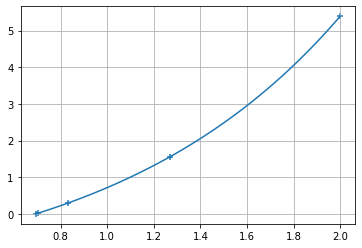

In [3]:
# example usage
f = lambda x: np.exp(x) - 2
Df = lambda x: np.exp(x)
root = newton_raphson(f, Df, 2.0, debug = True, plot = True)
